# Modelagem: Regressão Linear Simples e Múltipla


A análise de regressão linear estuda a relação entre uma variável dependente e as variáveis independentes. Através dessa análise, é possível encontrar padrões e replicar comportamentos.

O conjunto de dados consiste em várias variáveis preditoras (independentes) e uma variável alvo (dependente), pio (pressão intraocular). As variáveis independentes incluem a idade e sexo.

In [ ]:
#importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np


In [ ]:
dados = pd.read_excel('Dados_PIO.xlsx')

In [ ]:
#visualizar cabeçalho dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25 non-null     int64
 1   idade   25 non-null     int64
 2   pio     25 non-null     int64
 3   sexo    25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [ ]:
#Visualizar dimensão dos dados
dados.shape

(25, 4)

In [ ]:
dados.describe()

,id,idade,pio,sexo
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,54.880000,19.440000,0.560000
std,7.359801,9.871339,2.724579,0.506623
min,1.000000,35.000000,15.000000,0.000000
25%,7.000000,50.000000,18.000000,0.000000
50%,13.000000,55.000000,19.000000,1.000000
75%,19.000000,60.000000,22.000000,1.000000
max,25.000000,77.000000,24.000000,1.000000


## Variáveis Qualitativas

In [ ]:
#Frequência Absoluta
dados['sexo'].value_counts()

sexo
1    14
0    11
Name: count, dtype: int64

In [ ]:
#Frequência Relativa
dados['sexo'].value_counts(normalize=True)

sexo
1    0.56
0    0.44
Name: proportion, dtype: float64

In [ ]:
# Selecionando os dados
# Selecionar colunas por intervalo
dados_sel = dados.iloc[:, 1:3]
dados_sel.head()

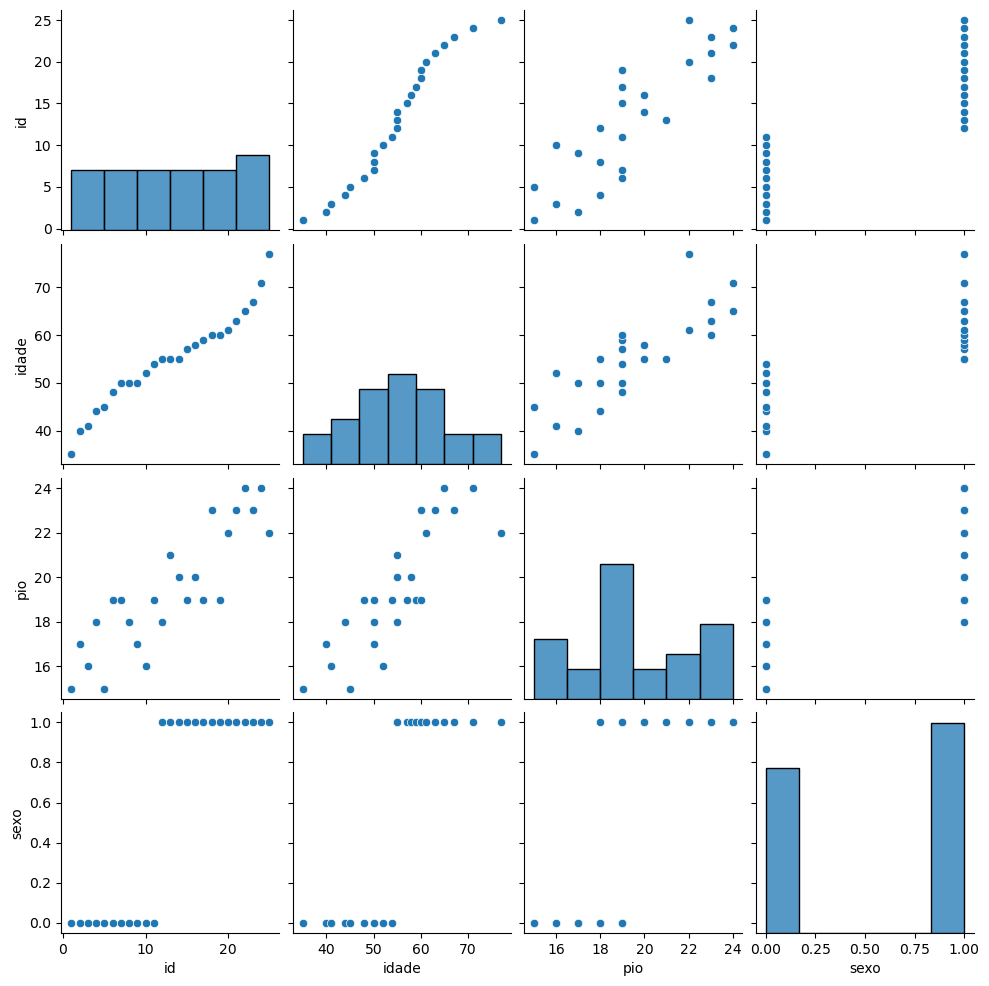

In [ ]:
sns.pairplot(dados_sel);

In [ ]:
dados.columns

Index(['id', 'idade', 'pio', 'sexo'], dtype='object')

In [ ]:
dados.head()

,id,idade,pio,sexo
0,1,35,15,0
1,2,40,17,0
2,3,41,16,0
3,4,44,18,0
4,5,45,15,0


In [ ]:
# Calcular a matriz de correlação
cor_matriz = dados_sel.corr()
cor_matriz

,idade,pio
idade,1.000000,0.844821
pio,0.844821,1.000000


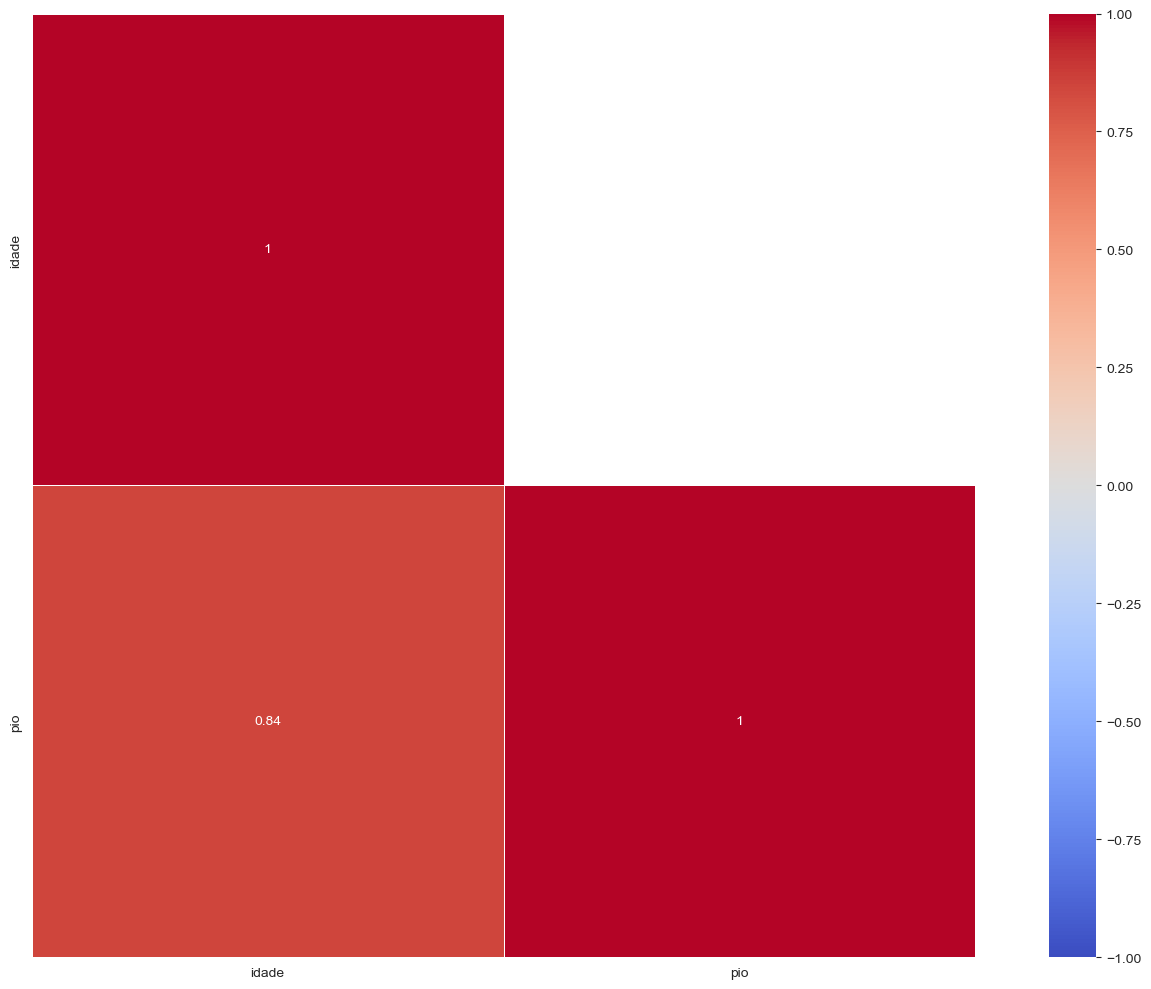

In [ ]:
# Criar uma máscara para ocultar os valores acima da diagonal
mask = np.triu(np.ones_like(cor_matriz, dtype=bool), k=1)

# Plotar a matriz de correlação com a máscara
plt.figure(figsize=(15,10))
sns.heatmap(cor_matriz, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, square=True, linewidths=.5)

# Ajustar rótulos e exibir o gráfico
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

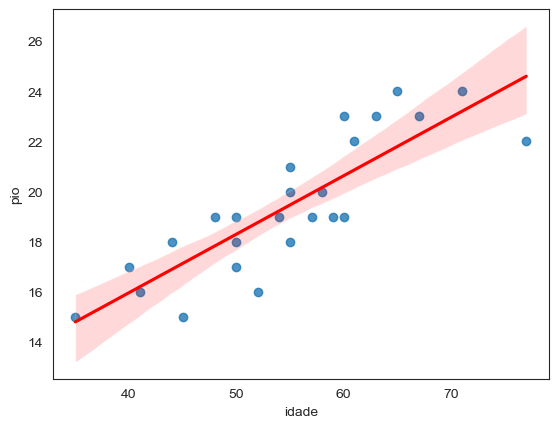

In [ ]:
#Regressão entre idade e a pio
sns.regplot(data=dados, x='idade', y='pio',line_kws={"color": "red"})
plt.show()

### Regressão Linear Simples


In [ ]:
# Y = b0 + b1x1 + e

In [ ]:
# Ajustando o modelo de regressão linear simples
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

modelo = ols('pio ~ idade',data=dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pio   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     57.34
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.09e-07
Time:                        14:32:13   Log-Likelihood:                -44.386
No. Observations:                  25   AIC:                             92.77
Df Residuals:                      23   BIC:                             95.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6432      1.716      3.871      0.0

### Interpretando a saída do modelo
Componentes mais importantes para avaliar na saída do modelo.

1. O R Quadrado ajustado (**Adj. R-squared**) reflete o ajuste do modelo. O R-Quadrado possui valor entre 0 e 1, e quanto maior esse valor, melhor o ajuste, assumindo que as condições do modelo foram adequadas.
2. O valor de **const** corresponde ao intercepto da variável Y. Isso signigica que se a variável independente for zero, o valor assumido será esse valor.
5. std err reflete o nível de acurácia dos coeficientes. Quanto menor esse valor, melhor o modelo será.
6. **P >|t|** representa o p-valor da variável. Um P-valor menor que 0.05 indica que a variável é estatisticamente significativa.

### Regressão Linear Múltipla

In [ ]:
# Y = b0 + b1x1 + b2x2 + e

In [ ]:
# Ajustando o modelo de regressão linear múltipla
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

modelo = ols('pio ~ idade + sexo',data=dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pio   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     30.07
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           5.09e-07
Time:                        15:17:17   Log-Likelihood:                -43.555
No. Observations:                  25   AIC:                             93.11
Df Residuals:                      22   BIC:                             96.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6162      2.336      3.689      0.0

In [ ]:
 # Calcula o fator de inflação da variância para as variávis explicativas do modelo (VIF)
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(vif)

[62.867438971501755, 2.647328859257735, 2.647328859257735]


 O VIF está indicando existência de multicolinearidade. No entanto, não parece estar causando nenhuma incoerência no modelo: nem nos sinais das estimativas dos parâmetros de regressão, nem em seus erros padrão e, portanto, não irei modificar o modelo devido a isso. Agora, vamos realizar as análises de resíduos.



In [ ]:
from scipy.stats import f

# valores preditos de E(Y)
ypred=res.fittedvalues

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,k) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Index([], dtype='int64') Index([], dtype='int64')


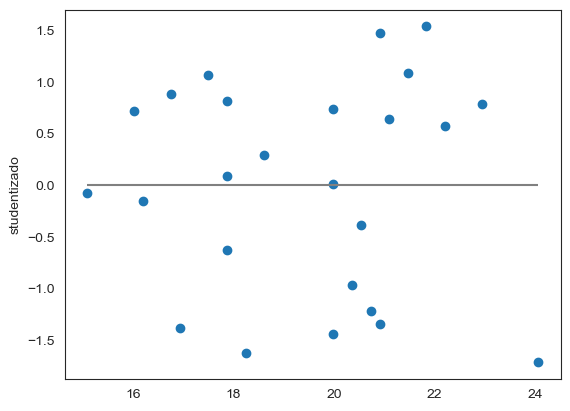

In [ ]:
plt.scatter(ypred, res_stud)
plt.ylabel('studentizado')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
print(dados.index[res_stud<-3],dados.index[res_stud>3]) # identifica as observações mais críticas

Index([], dtype='int64')


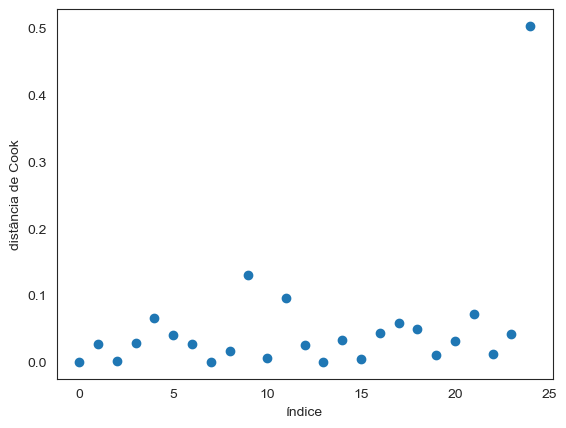

In [ ]:
plt.scatter(dados.index, cook)
plt.ylabel('distância de Cook')
plt.xlabel('índice')
print(dados.index[cook>f.ppf(.5, 5, 126)]) # valores que estão acima do percentil 50 de uma distribuição F(p,n-p)

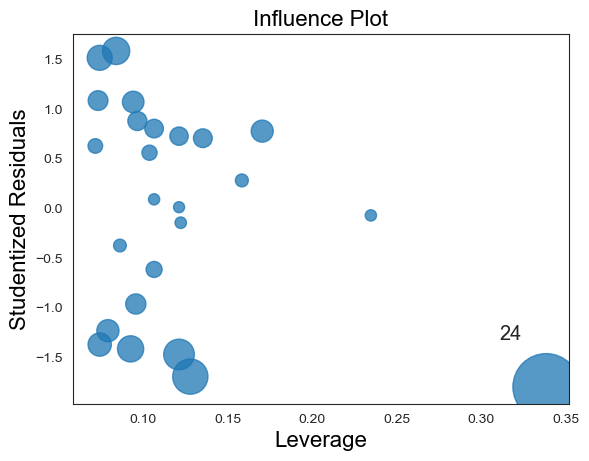

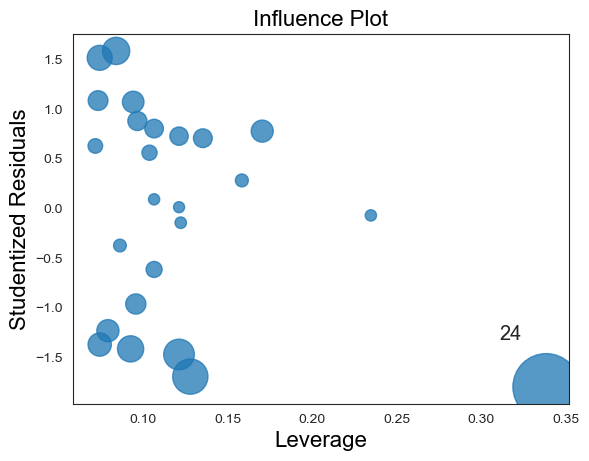

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Gráficos dos resíduos
fig = sm.graphics.influence_plot(res)


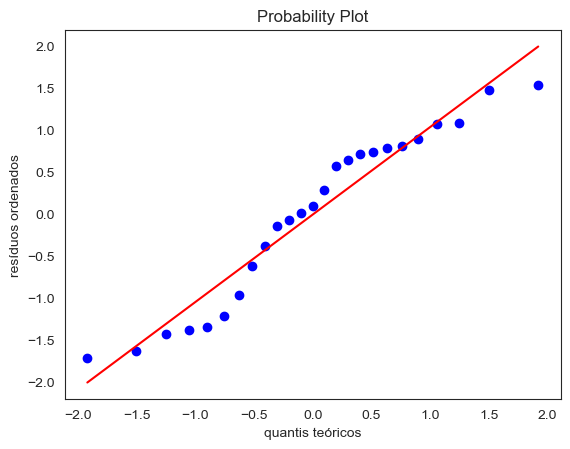

Index([], dtype='int64') Index([], dtype='int64')


In [ ]:
from scipy import stats

# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(res_stud, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()
print(dados.index[res_stud<-2],dados.index[res_stud>2])

Para mais informações sobre as funções de Regressão Linear da biblioteca Statsmodels, acesse:  https://www.statsmodels.org/stable/regression.html